In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.core.arrays.interval import value_counts
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:

plt.style.available
plt.style.use('classic')
data = pd.read_csv("/content/drug200.csv")
data.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: xlabel='Na_to_K', ylabel='Density'>

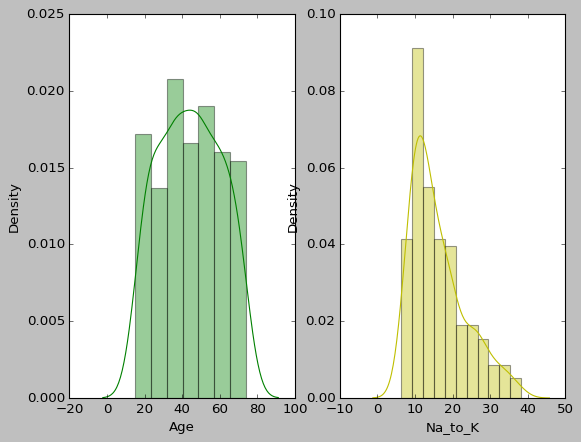

In [6]:
#checking data distribution
plt.subplot(121)
sns.distplot(data['Age'],color='g')
plt.subplot(122)
sns.distplot(data['Na_to_K'],color='y')

<Axes: xlabel='Drug', ylabel='Age'>

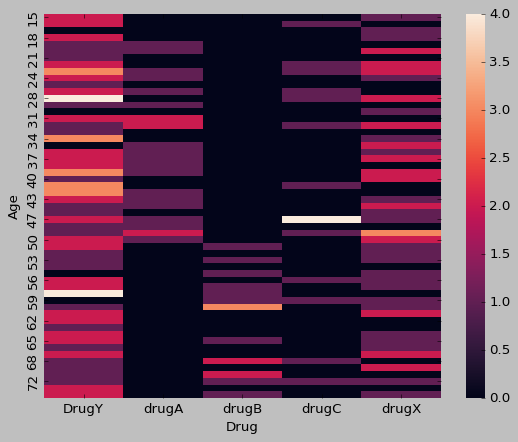

In [7]:
sns.heatmap(pd.crosstab(data['Age'],data['Drug']))

In [8]:
#descriptive analysis
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


<Axes: >

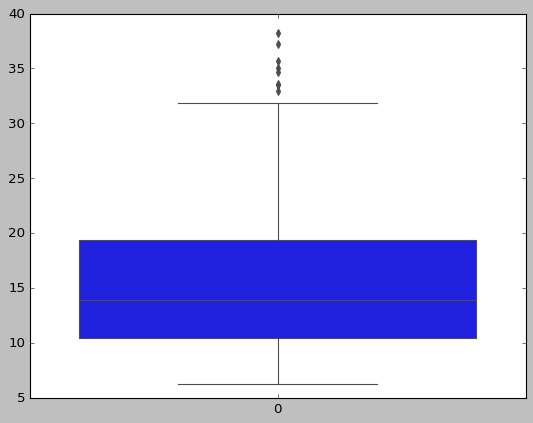

In [9]:
#checking outliers
sns.boxplot(data['Na_to_K'])

In [10]:
# finding outilers 

#IQ=Q3-Q1....,ub = q3+(1.5*IQR), lb = q1-(1.5*IQR)

q1=np.quantile(data['Na_to_K'],0.25)
q3=np.quantile(data['Na_to_K'],0.75)
print ('Q1 = {}'.format(q1))
print ('Q3 = {}'.format(q3))
IQR=q3-q1 
print('IQR value is {}'.format(IQR))
ub = q3+(1.5*IQR)
lb = q1-(1.5*IQR)
print('Upper Bound value is {} & The Lower Bound  value is {}'.format(ub,lb))

Q1 = 10.4455
Q3 = 19.38
IQR value is 8.9345
Upper Bound value is 32.78175 & The Lower Bound  value is -2.9562500000000007


In [11]:
data['Na_to_K']>ub


0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Na_to_K, Length: 200, dtype: bool

In [12]:
data[data['Na_to_K']>ub]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
24,33,F,LOW,HIGH,33.486,DrugY
96,58,F,LOW,HIGH,38.247,DrugY
98,20,M,HIGH,NORMAL,35.639,DrugY
128,47,M,LOW,NORMAL,33.542,DrugY
131,52,M,LOW,NORMAL,32.922,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY
188,65,M,HIGH,NORMAL,34.997,DrugY
194,46,F,HIGH,HIGH,34.686,DrugY


In [13]:
stats.probplot(np.log(data['Na_to_K']))


((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

In [14]:
#Handling outliers
def transform(variable):
  plt.figure(figsize=(14,6))
  plt.subplot(121)
  sns.distplot(variable)
  plt.subplot(122)
  stats.probplot(variable,plot=plt)

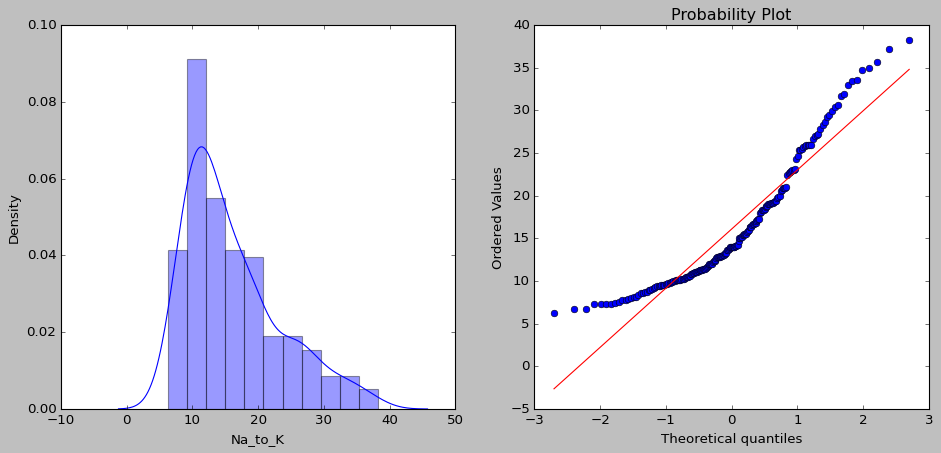

In [15]:
transform(data['Na_to_K'])

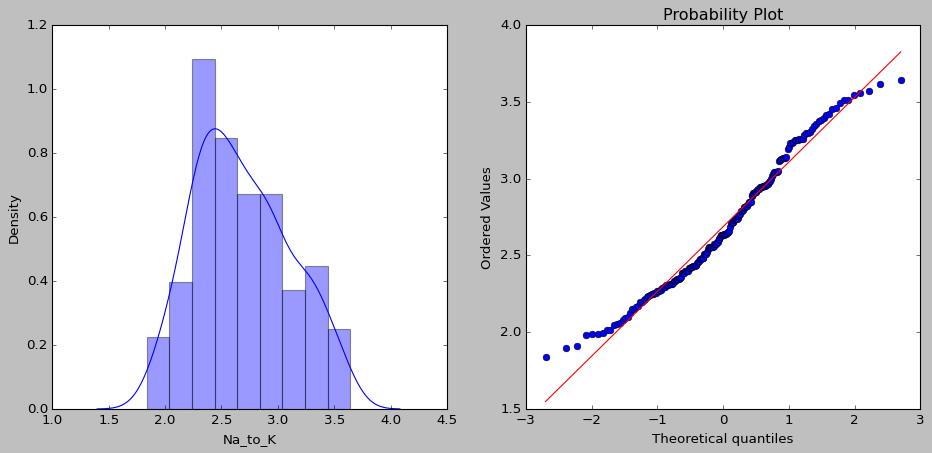

In [16]:
transform(np.log(data['Na_to_K']))

In [17]:
data['Na_to_K']=np.log(data['Na_to_K'])
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,3.232976,DrugY
1,47,M,LOW,HIGH,2.572078,drugC
2,47,M,LOW,HIGH,2.313921,drugC
3,28,F,NORMAL,HIGH,2.053867,drugX
4,61,F,LOW,HIGH,2.892758,DrugY


In [18]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [19]:
#Transforming-Encoding
data['Sex']=data['Sex'].replace({'F':0,'M':1})
data['BP']=data['BP'].replace({'LOW':0,'NORMAL':1,'HIGH':2})
data['Cholesterol']=data['Cholesterol'].replace({'NORMAL':0,'HIGH':1})
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,3.232976,DrugY
1,47,1,0,1,2.572078,drugC
2,47,1,0,1,2.313921,drugC
3,28,0,1,1,2.053867,drugX
4,61,0,0,1,2.892758,DrugY


In [20]:
#spliting dep & indep
x=data.drop('Drug',axis=1)
y=data['Drug']

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
xtrain.shape,xtest.shape

((140, 5), (60, 5))

In [23]:
#decision tree
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
DecisionTreeClassifier()
ytest

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
115    DrugY
69     DrugY
170    drugX
174    drugA
45     drugX
66     drugA
182    drugX
165    DrugY
78     drugA
186    drugB
177    DrugY
56     drugB
152    drugX
82     drugC
68     DrugY
124    drugB
16     drugX
148    drugX
93     DrugY
65     DrugY
60     DrugY
84     drugC
67     drugX
125    DrugY
132    drugX
9      DrugY
18     drugC
55     drugC
75     DrugY
150    drugA
104    DrugY
135    drugX
137    drugA
164    DrugY
76     drugA
79     drugX
197    drugX
38     drugX
24     DrugY
122    DrugY
195    drugC
29     DrugY
19     DrugY
143    DrugY
86     drugX
114    drugX
173    DrugY
5      drugX
126    DrugY
117    drugX
73     DrugY
140    drugA
98     DrugY
172    DrugY
96     DrugY
Name: Drug, dtype: object

In [24]:
dt.predict(xtest)

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

In [25]:
pd.DataFrame([ytest,dt.predict(xtest)])

,95,15,30,158,128,115,69,170,174,45,...,114,173,5,126,117,73,140,98,172,96
Drug,drugX,DrugY,drugX,drugC,DrugY,DrugY,DrugY,drugX,drugA,drugX,...,drugX,DrugY,drugX,DrugY,drugX,DrugY,drugA,DrugY,DrugY,DrugY
Unnamed 0,NaN,DrugY,DrugY,NaN,NaN,NaN,NaN,NaN,NaN,drugC,...,NaN,NaN,DrugY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pd.DataFrame(ytest,dt.predict(xtest),columns=['Actual','predict'])

,Actual,predict
drugX,NaN,NaN
DrugY,NaN,NaN
drugX,NaN,NaN
drugC,NaN,NaN
DrugY,NaN,NaN
DrugY,NaN,NaN
DrugY,NaN,NaN
drugX,NaN,NaN
drugA,NaN,NaN
drugX,NaN,NaN


In [27]:
pd.Series(dt.predict(xtest))

0     drugX
1     DrugY
2     drugX
3     drugC
4     DrugY
5     DrugY
6     DrugY
7     drugX
8     drugA
9     drugX
10    drugA
11    drugX
12    DrugY
13    drugA
14    drugB
15    DrugY
16    drugB
17    drugX
18    drugC
19    DrugY
20    drugB
21    drugX
22    drugX
23    DrugY
24    DrugY
25    DrugY
26    drugC
27    drugX
28    DrugY
29    drugX
30    DrugY
31    drugC
32    drugC
33    DrugY
34    drugA
35    DrugY
36    drugX
37    drugA
38    DrugY
39    drugA
40    drugX
41    drugX
42    drugX
43    DrugY
44    DrugY
45    drugC
46    DrugY
47    DrugY
48    DrugY
49    drugX
50    drugX
51    DrugY
52    drugX
53    DrugY
54    drugX
55    DrugY
56    drugA
57    DrugY
58    DrugY
59    DrugY
dtype: object

In [28]:
pd.DataFrame([ytest,pd.Series(dt.predict(xtest))],columns=['Actual','Predict'],)

,Actual,Predict
Drug,NaN,NaN
Unnamed 0,NaN,NaN


In [29]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [30]:
confusion_matrix(ytest,dt.predict(xtest))

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 18]])

In [31]:
dt.predict(xtest)


array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

In [32]:
a=pd.DataFrame([np.array(ytest),dt.predict(xtest)]).T
a.columns(['Actual_Value','Predicted_Value'])

TypeError: ignored

In [33]:
a

,0,1
0,drugX,drugX
1,DrugY,DrugY
2,drugX,drugX
3,drugC,drugC
4,DrugY,DrugY
5,DrugY,DrugY
6,DrugY,DrugY
7,drugX,drugX
8,drugA,drugA
9,drugX,drugX


In [34]:
rf=RandomForestClassifier()

In [35]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.83      0.91         6
       drugX       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



In [37]:
confusion_matrix(ytest,rf.predict(xtest))
  

array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 18]])

In [38]:
rf.predict(([[24,0,2,1,np.log(25)]]))

array(['DrugY'], dtype=object)

In [39]:
rf.predict(([[52,0,0,0,np.log(12)]]))

array(['drugX'], dtype=object)

In [40]:
rf.predict(([[52,1,1,1,np.log(22)]]))


array(['DrugY'], dtype=object)

In [46]:
import pickle
pickle.dump(svc1,open('thyroid_1_model.pk1','wb'))


NameError: ignored

In [47]:
print(classification_report(ytest,knn.predict(xtest)))

NameError: ignored

In [43]:
confusion_matrix(ytest,rf.predict(xtest))


array([[26,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 18]])

In [44]:
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [45]:
print(classification_report(ytest,svc.predict(xtest)))

              precision    recall  f1-score   support

       DrugY       0.43      1.00      0.60        26
       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.00      0.00      0.00        18

    accuracy                           0.43        60
   macro avg       0.09      0.20      0.12        60
weighted avg       0.19      0.43      0.26        60



In [48]:
confusion_matrix(ytest,svc.predict(xtest))

array([[26,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [18,  0,  0,  0,  0]])

In [49]:
svc1=SVC(kernel='linear')
svc1.fit(xtrain,ytrain)


SVC(kernel='linear')

In [50]:
print(classification_report(ytest,svc.predict(xtest)))

              precision    recall  f1-score   support

       DrugY       0.43      1.00      0.60        26
       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.00      0.00      0.00        18

    accuracy                           0.43        60
   macro avg       0.09      0.20      0.12        60
weighted avg       0.19      0.43      0.26        60



In [51]:
confusion_matrix(ytest,svc.predict(xtest))


array([[26,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [18,  0,  0,  0,  0]])

In [52]:
#Model building
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='linear'))

In [53]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

In [54]:
model.fit(xtrain,ytrain,batch_size=2,epochs=2)

Epoch 1/2


UnimplementedError: ignored

In [55]:
#ANN Classification
data['Na_to_K']=np.log(data['Na_to_K'])
data['Sex']=[0 if x=='M' else 1 for x in data['Sex']]
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,1.173403,DrugY
1,47,1,0,1,0.944714,drugC
2,47,1,0,1,0.838943,drugC
3,28,1,1,1,0.719724,drugX
4,61,1,0,1,1.062210,DrugY


In [56]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [57]:
data['Drug']=[0 if x=='drugA' else 1 if x=='drugB' else 2 if x=='drugC' else 3 if x=='drugX' else 4 for  x in data['Drug']]

In [58]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,1.173403,4
1,47,1,0,1,0.944714,2
2,47,1,0,1,0.838943,2
3,28,1,1,1,0.719724,3
4,61,1,0,1,1.062210,4


In [59]:
y=data['Drug']
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [61]:
#Classification
classification=Sequential()
classification.add(Dense(5,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(5,activation='softmax'))

In [62]:
classification. compile(optimizer='adam',loss='sparse_categorical_crossentropy',matrics=['accuracy'])

TypeError: ignored

In [63]:
classification.fit(x_train,y_train,batch_size=2,epochs=30,validation_data=(x_test,y_test))

RuntimeError: ignored

In [64]:
classification.predict([[32,1,1,0,np.log(1)]])

1/1 [==============================] - 0s 204ms/step


array([[0.09324051, 0.45112538, 0.21626192, 0.16876432, 0.07060798]],
      dtype=float32)

In [65]:
import pickle 
pickle.dump(svc1,open('thyroid_1_model.pkl','wb'))                                                            